<a href="https://colab.research.google.com/github/dudubouneto/Disc_FluxoVacinacao/blob/main/Densidade_Demogr%C3%A1fica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Discretização das variáveis/Data/final_novo_ibge_sp - final_novo_ibge_sp_cpy.csv')
data.head()

,Município,Codigo_IBGE,Gentílico,Prefeito,Área Territorial,População Estimada,Densidade Demográfica,Escolarização 6 a 14 anos,IDHM,Mortalidade Infantil,Receitas Realizadas,Despesas empenhadas,PIB per capita,Latitude,Longitude,Postos vacinação,Hospitais,Médicos
0,ADAMANTINA,3500105,adamantinense,MARCIO CARDIM,412,35111,"82,15","97,6",790,"11,63","16,071,867,925","13,708,366,993","30962,66",-22,-511,4,0,0
1,ADOLFO,3500204,adolfino,IZAEL ANTONIO FERNANDES,211,3554,"16,85","98,6",730,"19,23","2,733,374,731","2,010,387,713","25867,75",-212,-496,1,0,0
2,AGUAÍ,3500303,aguaiano,JOSÉ ALEXANDRE PEREIRA DE ARAÚJO,475,36648,"67,72","95,8",715,"16,06","8,409,476,006","7,216,873,408","28041,03",-221,-470,5,0,0
3,ÁGUAS DA PRATA,3500402,pratense,REGINA HELENA JANIZELO MORAES,143,8221,"53,05","98,8",781,"25,32","2,939,024,814","2,436,340,149","20683,88",-219,-467,1,0,0
4,ÁGUAS DE LINDÓIA,3500501,lindoiense,GILBERTO ABDOU HELOU,60,18808,"287,16","96,2",745,"8,37","8,694,922,213","7,520,147,793","26427,34",-225,-466,4,0,0


In [ ]:
data = data[['Município', 'Densidade Demográfica']]
data.head()

,Município,Densidade Demográfica
0,ADAMANTINA,"82,15"
1,ADOLFO,"16,85"
2,AGUAÍ,"67,72"
3,ÁGUAS DA PRATA,"53,05"
4,ÁGUAS DE LINDÓIA,"287,16"


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Município              645 non-null    object
 1   Densidade Demográfica  645 non-null    object
dtypes: object(2)
memory usage: 10.2+ KB


In [ ]:
# convertendo para float64
def to_float(x):
  x = x.replace(',', '')
  x = float(x)
  x /= 100
  return x

data['Densidade Demográfica'] = data['Densidade Demográfica'].apply(to_float)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Município              645 non-null    object 
 1   Densidade Demográfica  645 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


##Tentativa de distribuição por quartis

In [ ]:
data.describe()

,Densidade Demográfica
count,645.000000
mean,268.770760
std,1122.898312
min,0.100000
25%,16.780000
50%,32.790000
75%,90.030000
max,12536.990000


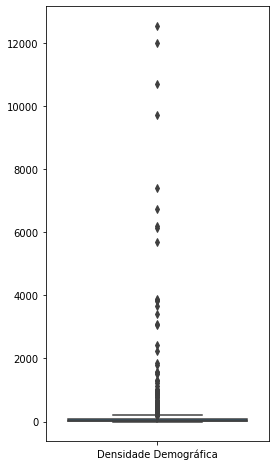

In [ ]:
plt.figure(figsize=(4,8))
sns.boxplot(data=data)

**Buscando os outliers** <br> ```Ao todo, 51 outliers```

In [ ]:
firstQuartile = thirdQuartile = data['Densidade Demográfica'].quantile(.25)
thirdQuartile = data['Densidade Demográfica'].quantile(.75)
topLim = thirdQuartile + 1.5*(thirdQuartile - firstQuartile)
outliers = data[data['Densidade Demográfica'] > 500]
outliers.reset_index(drop=True, inplace=True)
outliers.head()

,Município,Densidade Demográfica
0,AMERICANA,1572.75
1,ARUJÁ,779.33
2,BARUERI,3665.21
3,BAURU,515.12
4,CAIEIRAS,900.37


In [ ]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Município              51 non-null     object 
 1   Densidade Demográfica  51 non-null     float64
dtypes: float64(1), object(1)
memory usage: 944.0+ bytes


## Adotando a distribuição do mapa do IBGE

[Mapa no qual a binarização foi baseada](https://drive.google.com/file/d/1Bv9hOmI2tXeh7vugAwQ84L2zMkGTMu0o/view?usp=sharing)

In [ ]:
bins = [0, 1, 5, 10, 15, 20, 50, 100, 250, 500, data['Densidade Demográfica'].max()]
labels = ['até 1', '1.1 a 5', '5.1 a 10', '10.1 a 15', '15.1 a 20', '20.1 a 50', '50.1 a 100', '100.1 a 250', '250.1 a 500', 'acima de 500']
data['Classe Densidade Demográfica'] = pd.cut(data['Densidade Demográfica'], bins=bins, labels=labels)
data.head(10)

,Município,Densidade Demográfica,Classe Densidade Demográfica
0,ADAMANTINA,82.15,50.1 a 100
1,ADOLFO,16.85,15.1 a 20
2,AGUAÍ,67.72,50.1 a 100
3,ÁGUAS DA PRATA,53.05,50.1 a 100
4,ÁGUAS DE LINDÓIA,287.16,250.1 a 500
5,ÁGUAS DE SANTA BÁRBARA,13.83,10.1 a 15
6,ÁGUAS DE SÃO PEDRO,488.89,250.1 a 500
7,AGUDOS,35.73,20.1 a 50
8,ALAMBARI,30.66,20.1 a 50
9,ALFREDO MARCONDES,32.86,20.1 a 50


**Histograma da distribuição**

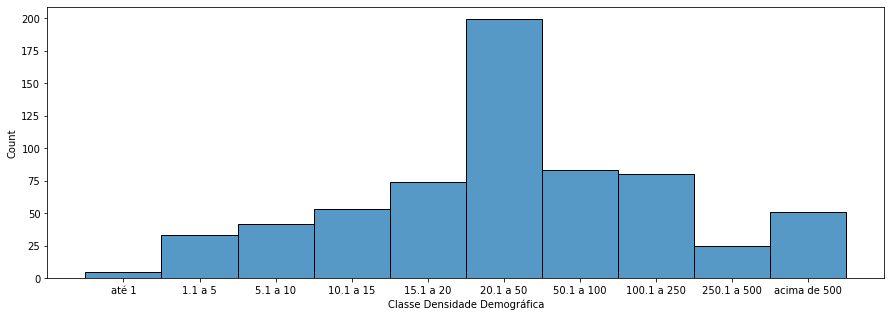

In [ ]:
plt.figure(figsize=(15,5))
sns.histplot(data=data['Classe Densidade Demográfica'])